# Data exploration

In [69]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

In [70]:
df1 = pd.read_csv('./data/GPP_NEE_flux_2001-2022.csv')
df2 = pd.read_csv('./data/voc_2010-2022.csv')
df3 = pd.read_csv('./data/latent_heat_flux_2018-2022.csv')
df4 = pd.read_csv('./data/latent_heat_flux_2001-2018.csv')

## Original data without any manipulation

In [71]:
df1.head()

,Unnamed: 0,Datetime,NEE,NEE_gapfilling_method,GPP
0,0,2001-01-01 00:00:00,0.459,1,-0.0
1,1,2001-01-01 00:30:00,0.459,1,-0.0
2,2,2001-01-01 01:00:00,0.459,1,-0.0
3,3,2001-01-01 01:30:00,0.459,1,-0.0
4,4,2001-01-01 02:00:00,0.458,1,-0.0


<Axes: xlabel='Datetime'>

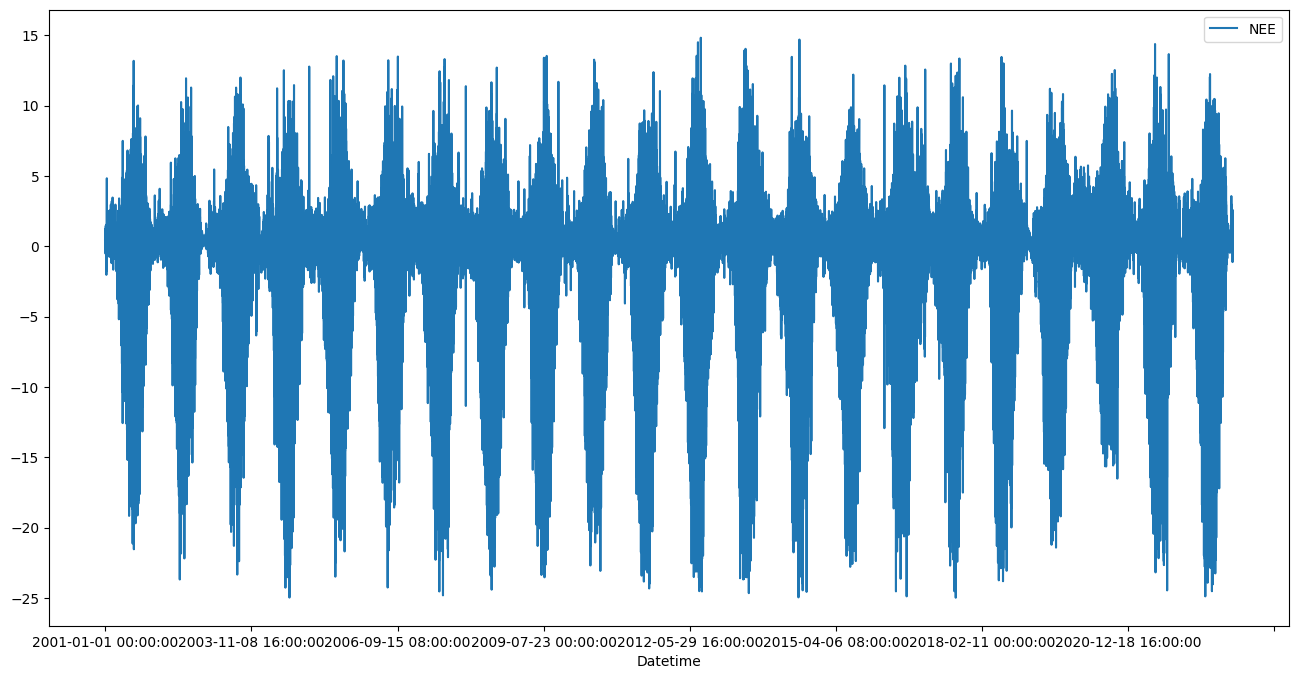

In [72]:
fig, ax = plt.subplots(figsize=(16,8))
df1.plot('Datetime', 'NEE', ax=ax)

In [73]:
df2.head()

,Unnamed: 0,Datetime,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
0,0,2010-05-28 17:22:00,47.81872,-2.07877,-1.91743,-1.50219
1,1,2010-05-28 20:22:00,9.34395,0.66285,-3.22838,0.39991
2,2,2010-05-28 23:22:00,10.63157,-1.77225,-3.11930,-0.03744
3,3,2010-05-29 02:22:00,12.27364,-2.02885,-2.26063,-0.53726
4,4,2010-05-29 05:22:00,19.89456,-2.66424,NaN,0.64042


<Axes: xlabel='Datetime'>

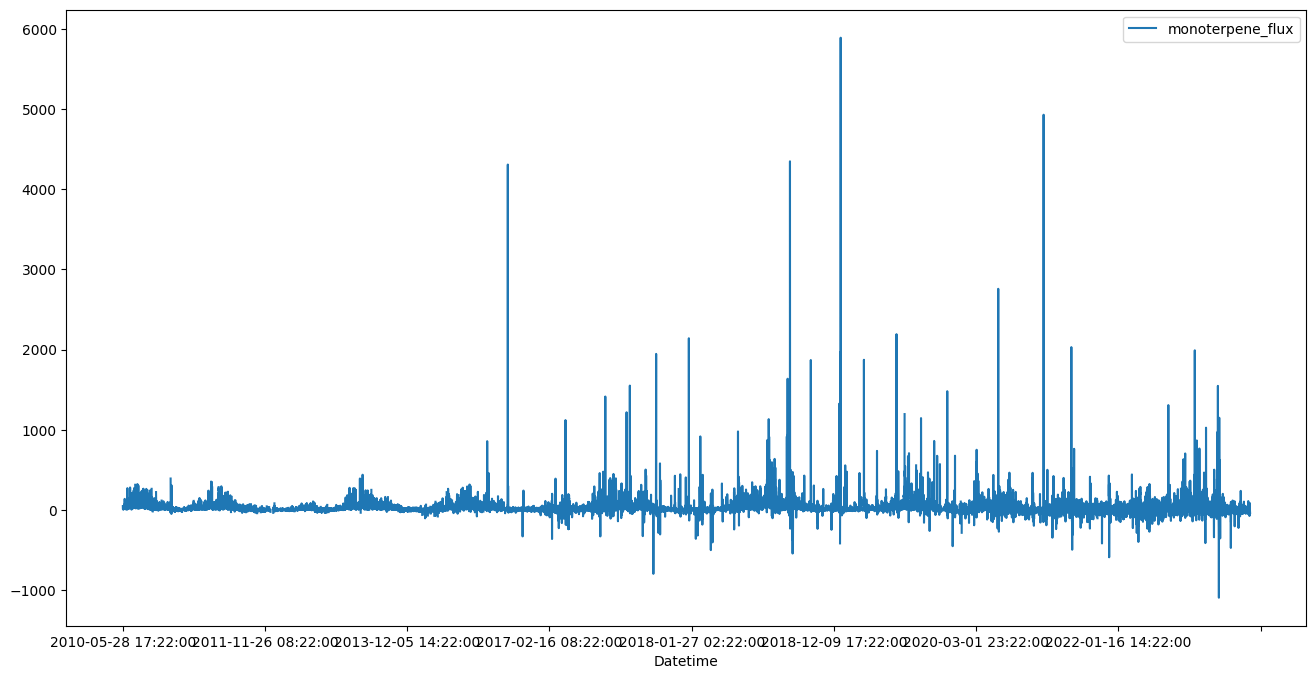

In [74]:
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','monoterpene_flux', ax=ax)

<Axes: xlabel='Datetime'>

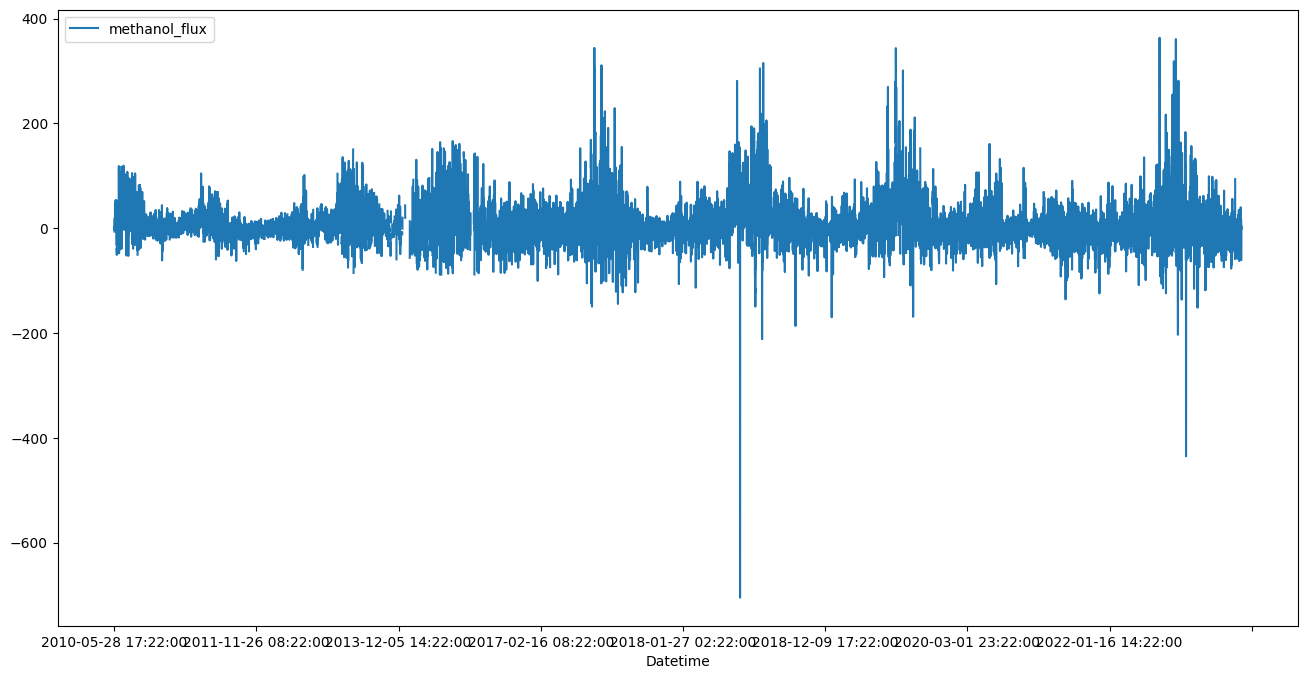

In [75]:
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','methanol_flux', ax=ax)

<Axes: xlabel='Datetime'>

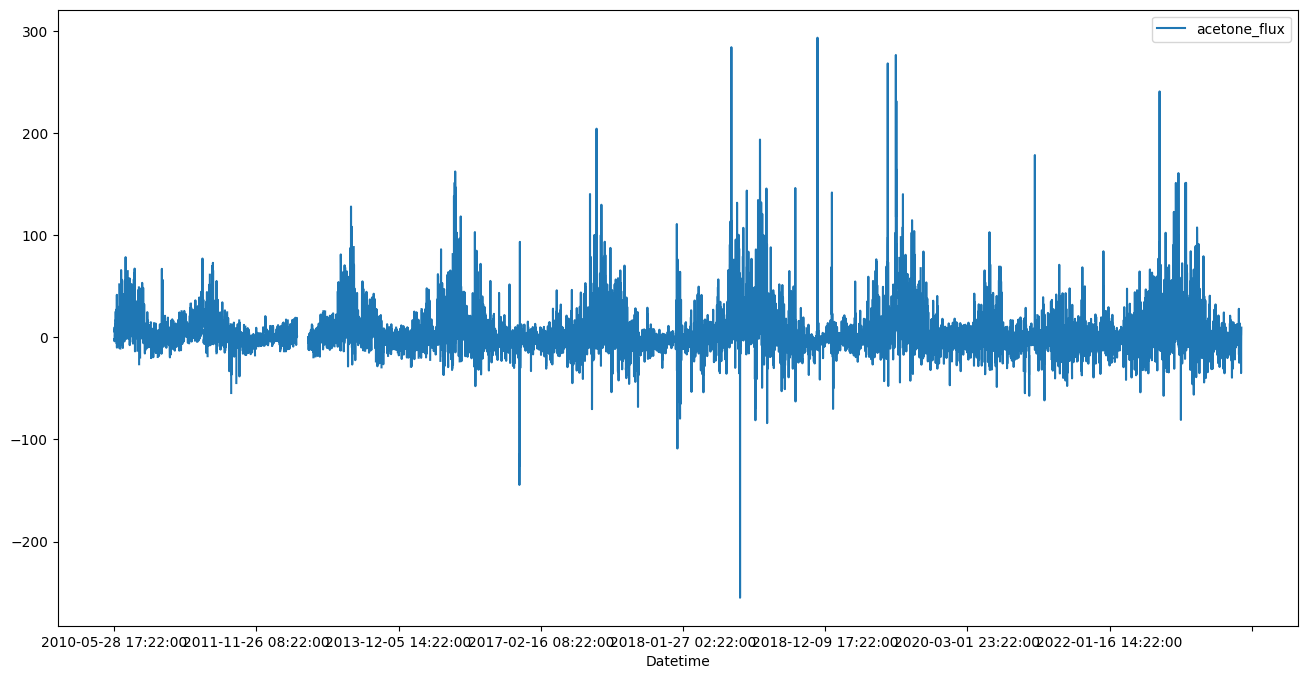

In [76]:
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetone_flux', ax=ax)

<Axes: xlabel='Datetime'>

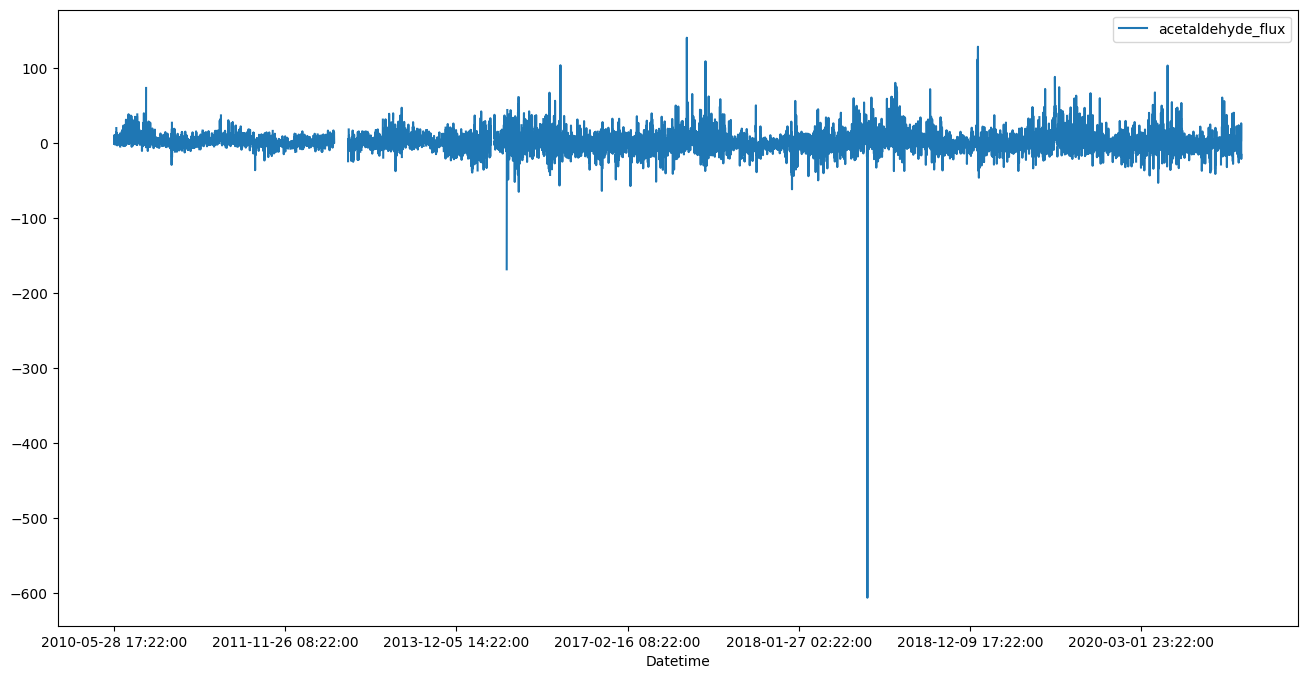

In [77]:
fig, ax = plt.subplots(figsize=(16,8))
df2.plot('Datetime','acetaldehyde_flux', ax=ax)

<Axes: xlabel='Datetime'>

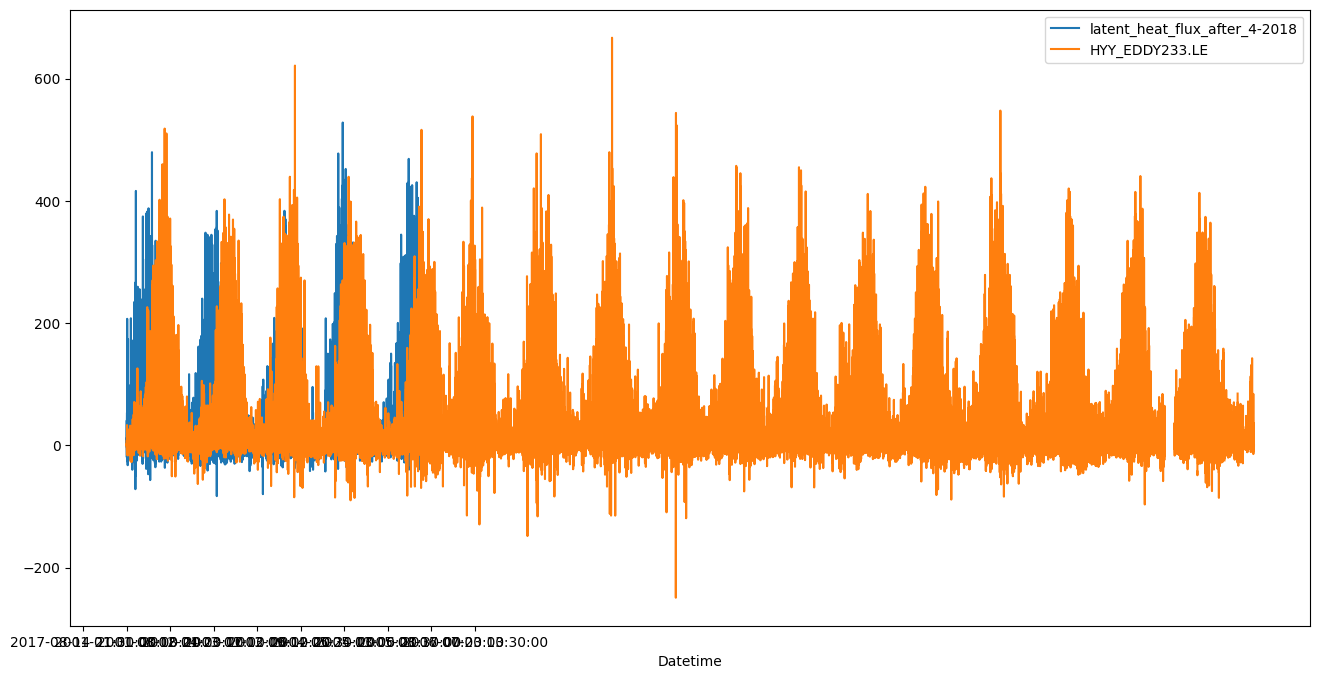

In [78]:
fig, ax = plt.subplots(figsize=(16,8))
df3.plot('Datetime','latent_heat_flux_after_4-2018', ax=ax)
df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)

## Daily data

In [79]:
# converting the dates to datetime objects

from datetime import datetime

df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df3['Datetime'] = pd.to_datetime(df3['Datetime'])
df4['Datetime'] = pd.to_datetime(df4['Datetime'])


In [80]:
daily_df1 = df1.resample('D', on = 'Datetime').mean().reset_index()
daily_df1.head()

,Datetime,Unnamed: 0,NEE,NEE_gapfilling_method,GPP
0,2001-01-01,23.5,0.440229,0.9375,0.030229
1,2001-01-02,71.5,0.338042,0.1250,0.132167
2,2001-01-03,119.5,0.375271,0.0000,0.100937
3,2001-01-04,167.5,0.571833,0.5000,-0.086917
4,2001-01-05,215.5,0.460375,2.0000,0.065333


<Axes: xlabel='Datetime'>

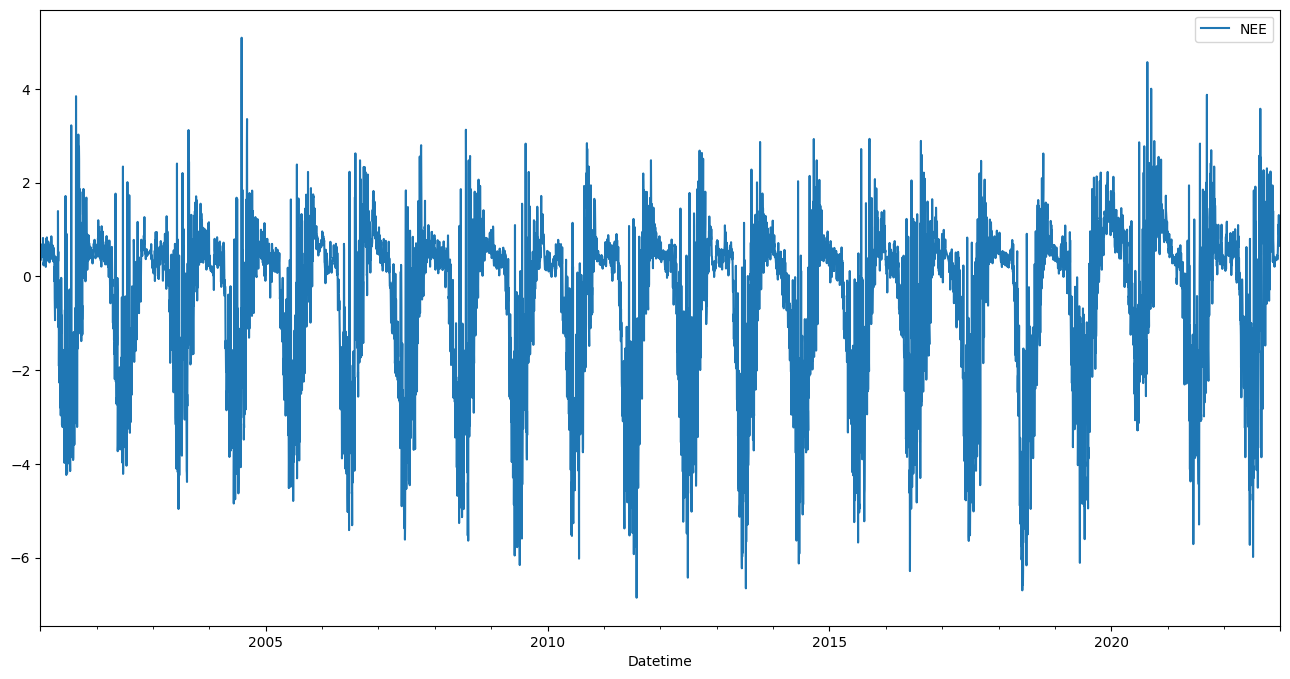

In [81]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df1.plot('Datetime','NEE', ax=ax)

In [82]:
daily_df2 = df2.resample('D', on = 'Datetime').mean().reset_index()
daily_df2.head()

,Datetime,Unnamed: 0,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
0,2010-05-28,1.0,22.598080,-1.062723,-2.755037,-0.379907
1,2010-05-29,5.5,15.633765,3.231148,4.274000,2.796232
2,2010-05-30,12.5,23.148101,14.252623,0.654239,1.739013
3,2010-05-31,19.5,42.020850,25.304985,6.655295,3.157963
4,2010-06-01,25.5,54.729205,35.743562,13.563225,10.182586


<Axes: xlabel='Datetime'>

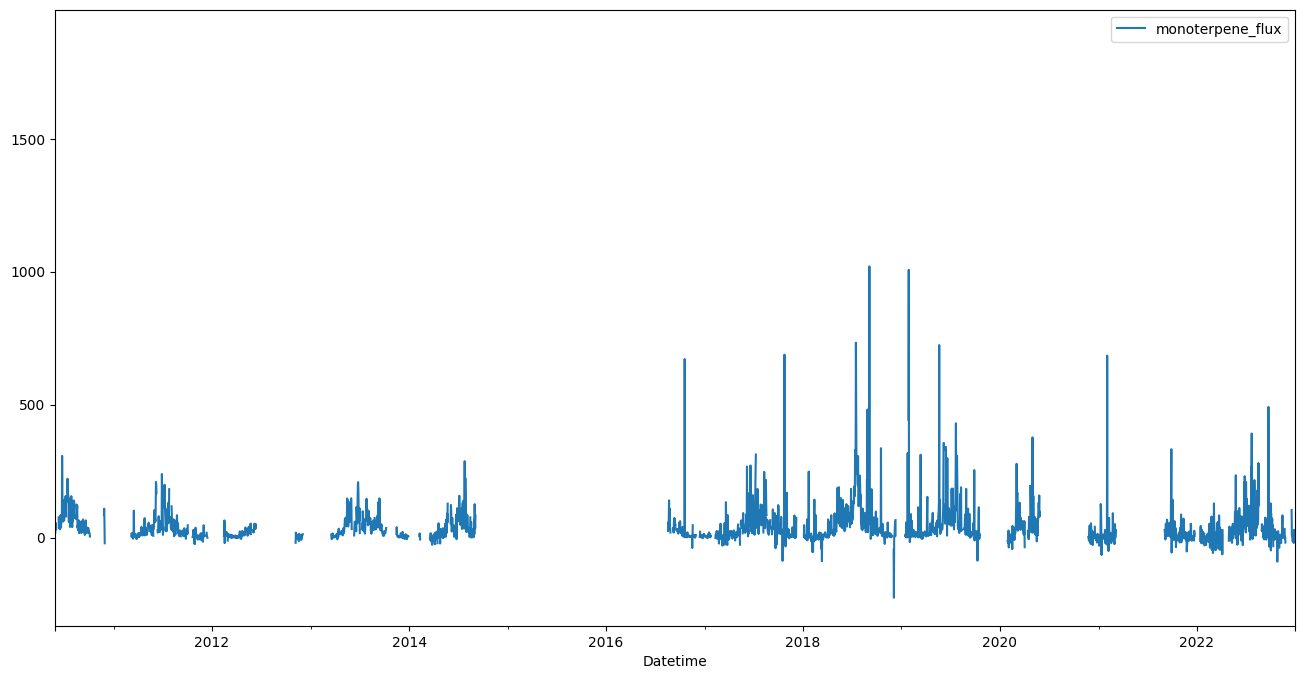

In [83]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'monoterpene_flux', ax=ax)

<Axes: xlabel='Datetime'>

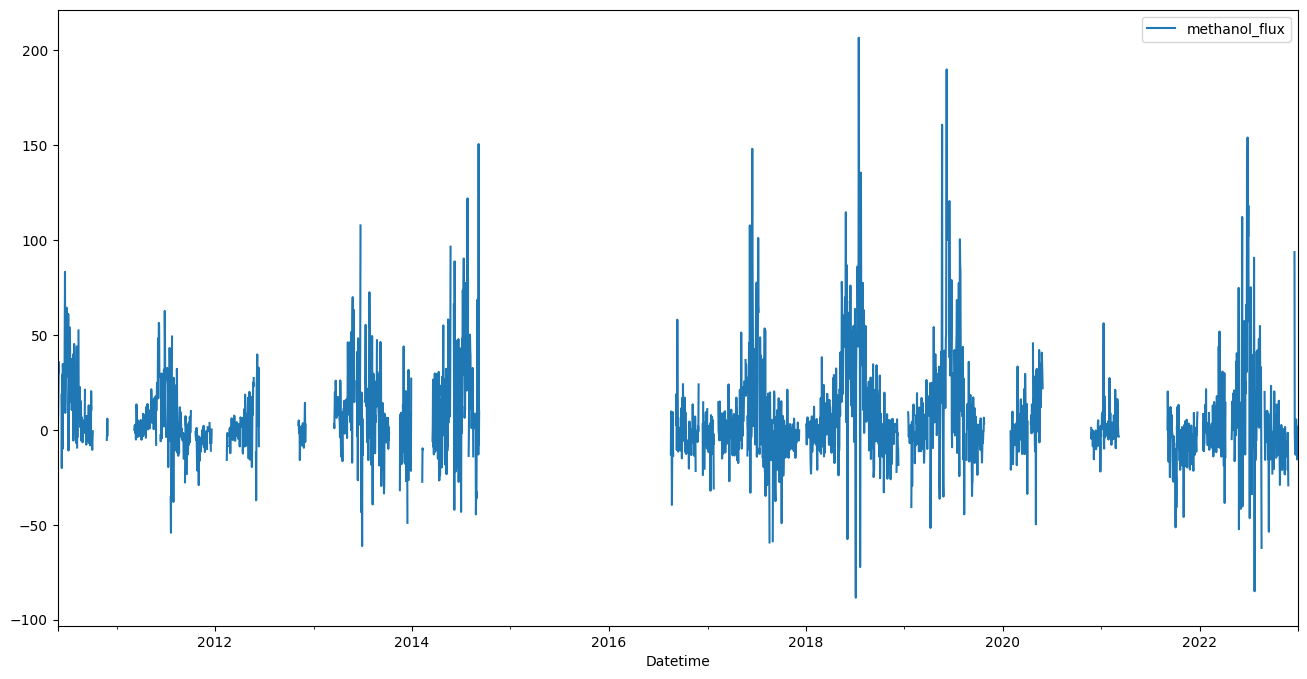

In [84]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'methanol_flux', ax=ax)

<Axes: xlabel='Datetime'>

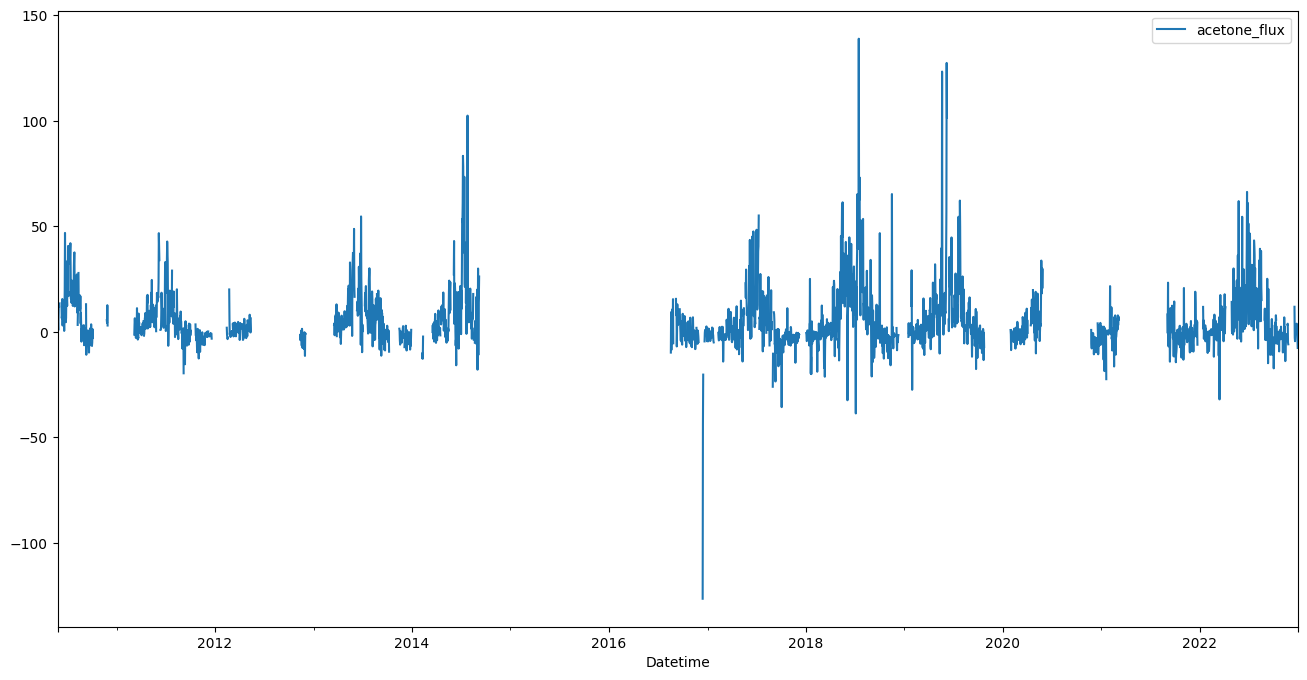

In [85]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'acetone_flux', ax=ax)

<Axes: xlabel='Datetime'>

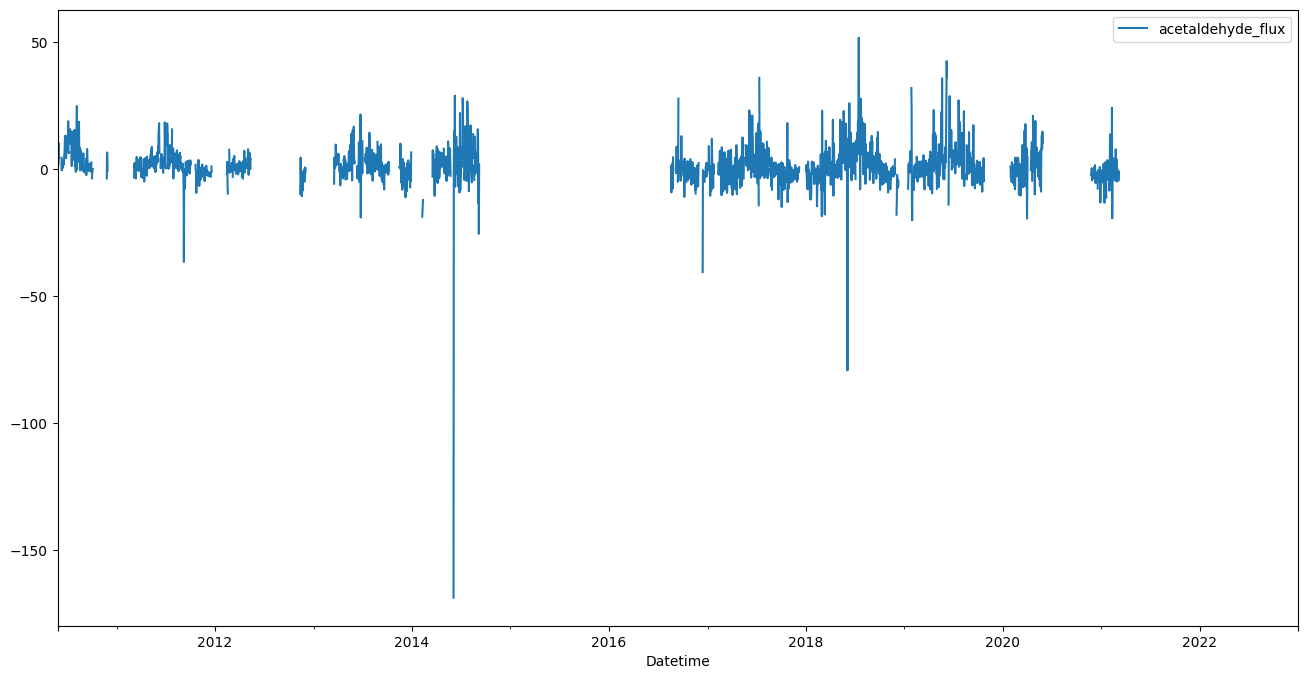

In [86]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

In [87]:
daily_df3 = df3.resample('D', on = 'Datetime').mean().reset_index()
daily_df3.head()

,Datetime,Unnamed: 0,latent_heat_flux_after_4-2018,latent_heat_flux_quality_flag_after_4-2018
0,2018-04-01,21.0,4.842121,0.930233
1,2018-04-02,66.5,13.763916,0.250000
2,2018-04-03,114.5,54.836406,0.104167
3,2018-04-04,162.5,0.948640,0.395833
4,2018-04-05,209.5,-2.989982,0.304348


In [88]:
daily_df4 = df4.resample('D', on = 'Datetime').mean().reset_index()
daily_df4.head()

,Datetime,Unnamed: 0,HYY_EDDY233.LE,HYY_EDDY233.Qc_LE
0,2001-01-01,23.5,1.288385,NaN
1,2001-01-02,71.5,2.810994,NaN
2,2001-01-03,119.5,2.135907,NaN
3,2001-01-04,155.5,5.834787,NaN
4,2001-01-05,NaN,NaN,NaN


<Axes: xlabel='Datetime'>

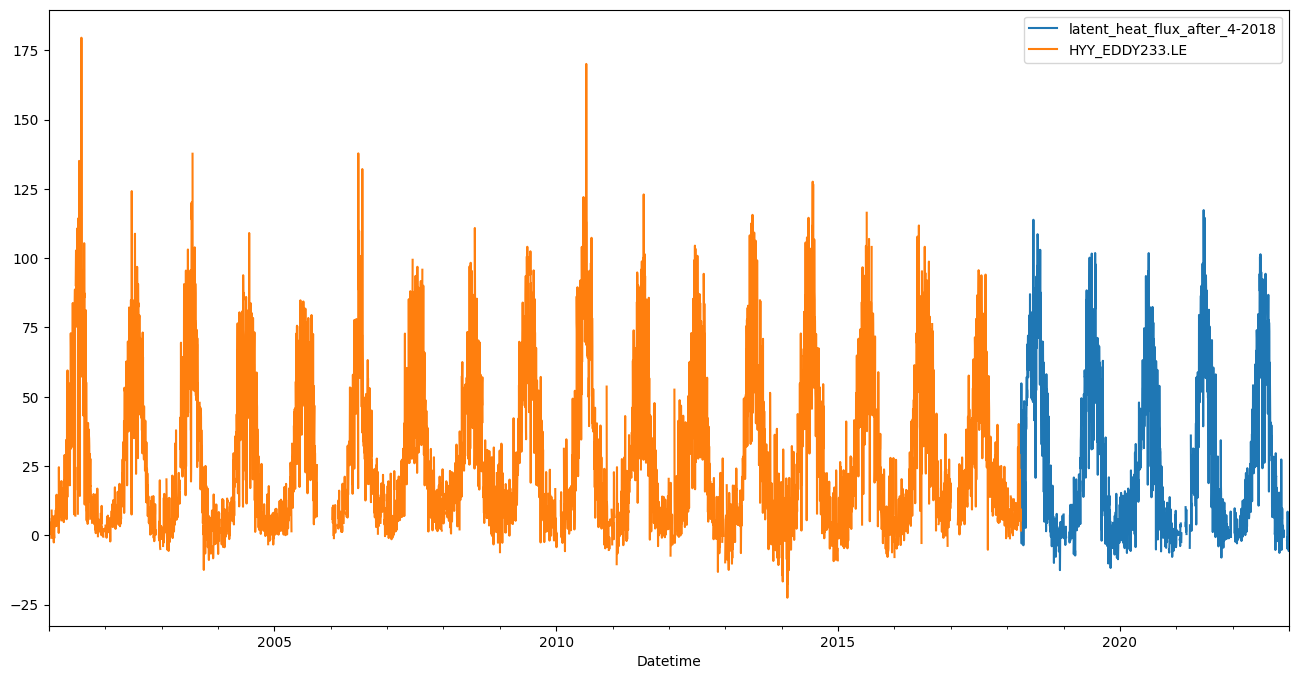

In [89]:
fig, ax = plt.subplots(figsize=(16,8))
daily_df3.plot('Datetime', 'latent_heat_flux_after_4-2018', ax=ax)
daily_df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)

## Weekly data

In [90]:
weekly_df1 = df1.resample('W', on = 'Datetime').mean().reset_index()
weekly_df1.head()

,Datetime,Unnamed: 0,NEE,NEE_gapfilling_method,GPP
0,2001-01-07,167.5,0.454405,1.074405,0.052116
1,2001-01-14,503.5,0.553640,0.872024,0.103729
2,2001-01-21,839.5,0.571839,0.639881,0.088318
3,2001-01-28,1175.5,0.396991,0.449405,0.084801
4,2001-02-04,1511.5,0.506985,0.562500,-0.023199


<Axes: xlabel='Datetime'>

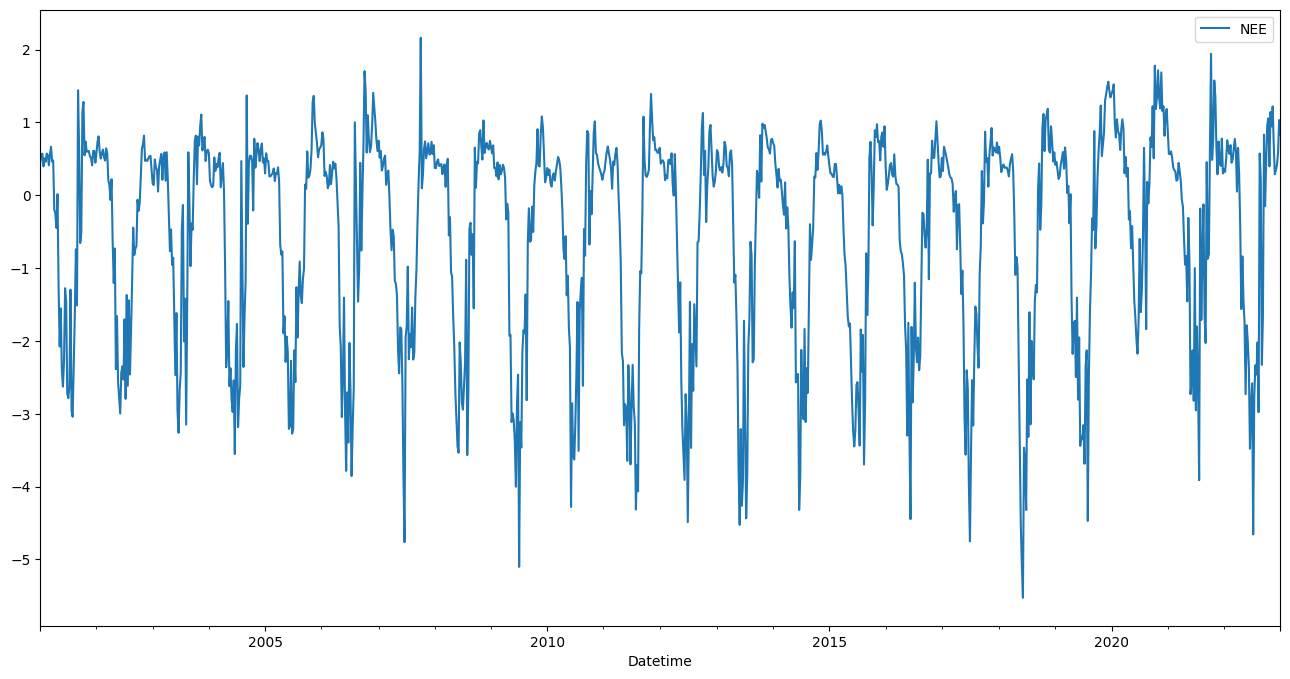

In [92]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df1.plot('Datetime','NEE', ax=ax)

In [93]:
weekly_df2 = df2.resample('W', on = 'Datetime').mean().reset_index()
weekly_df2.head()

,Datetime,Unnamed: 0,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
0,2010-05-30,8.0,20.227096,7.515729,1.178971,1.738222
1,2010-06-06,23.5,46.305097,30.509097,10.370366,6.627515
2,2010-06-13,39.5,49.016581,-2.275719,9.034403,1.905280
3,2010-06-20,66.5,56.933623,17.934054,8.571574,2.221776
4,2010-06-27,103.0,97.048479,29.905548,14.514005,6.955430


<Axes: xlabel='Datetime'>

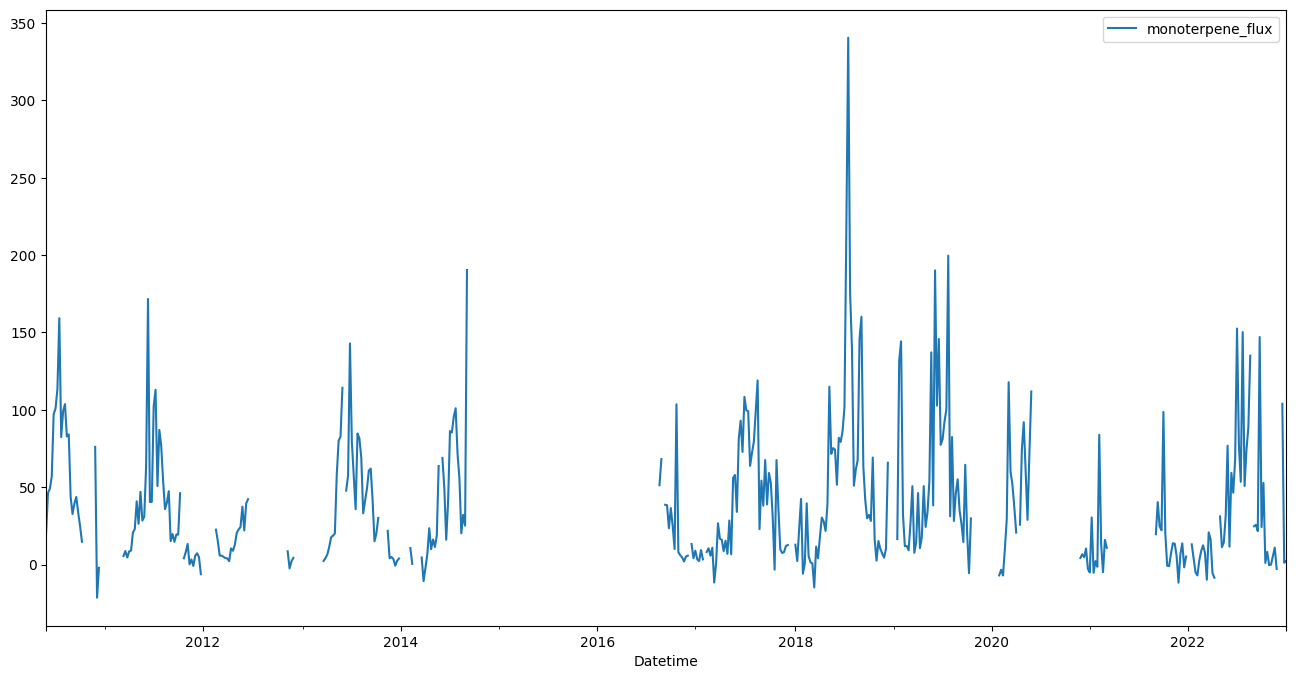

In [95]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'monoterpene_flux', ax=ax)

<Axes: xlabel='Datetime'>

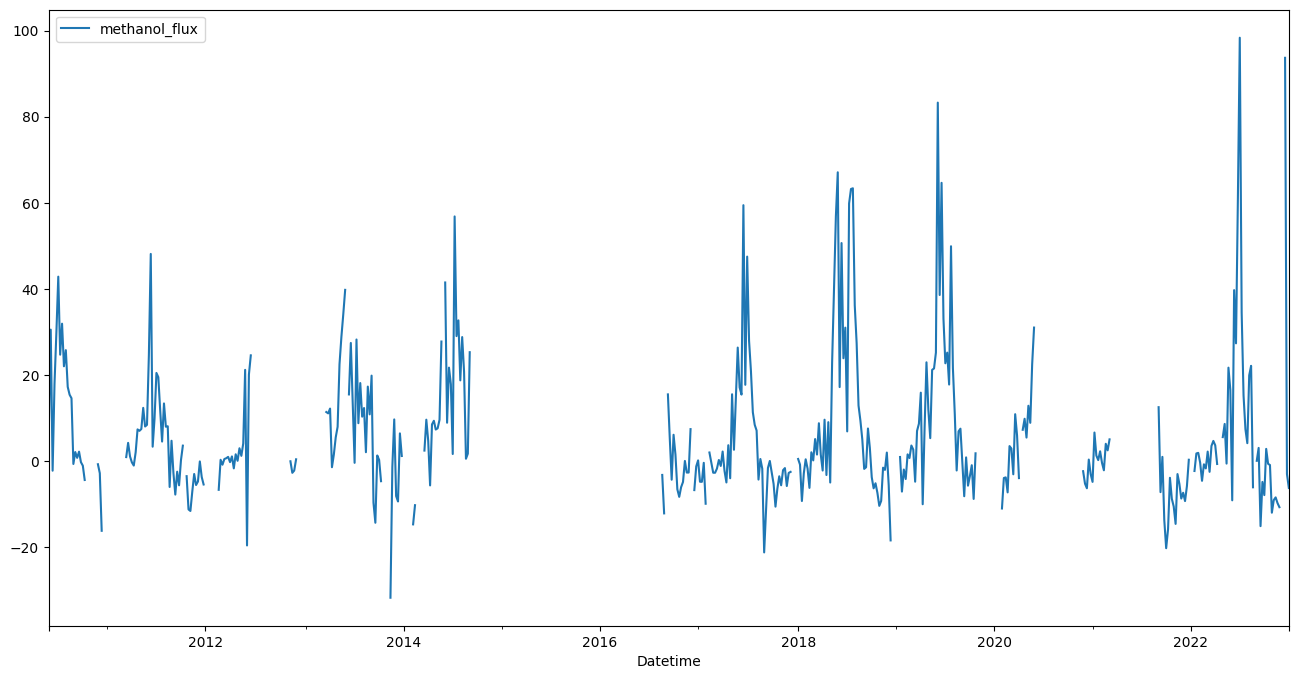

In [96]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'methanol_flux', ax=ax)

<Axes: xlabel='Datetime'>

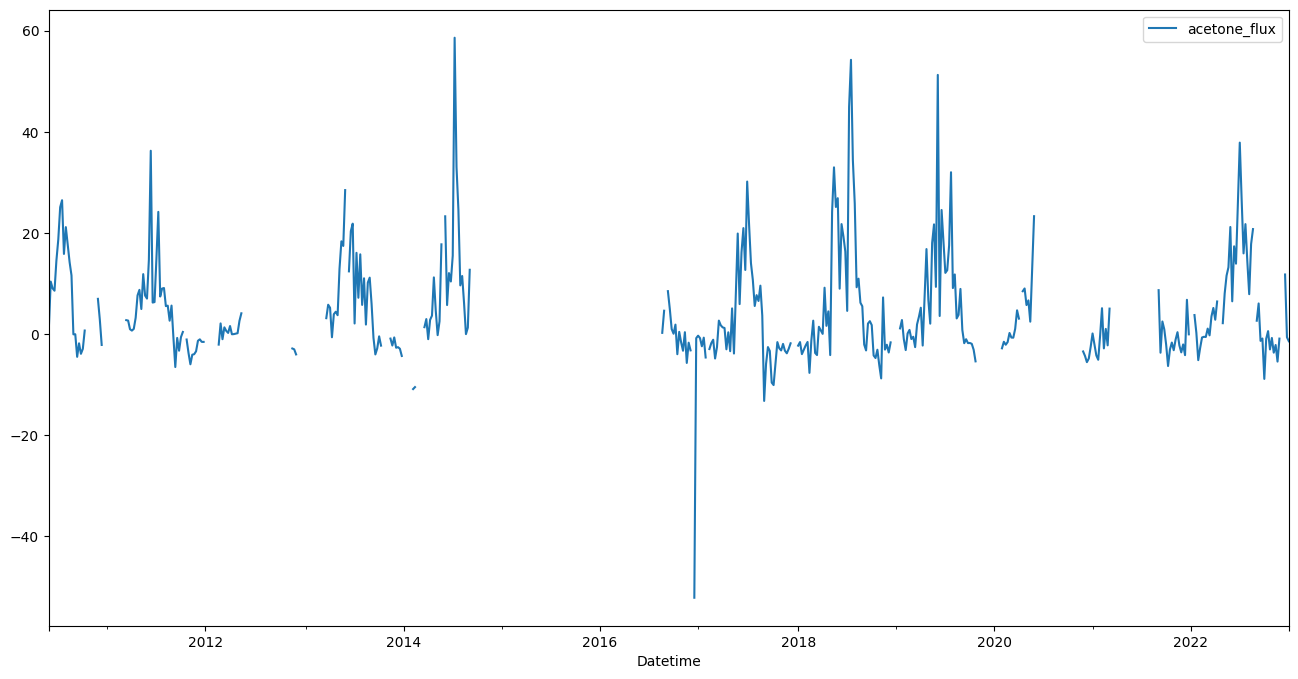

In [97]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'acetone_flux', ax=ax)

<Axes: xlabel='Datetime'>

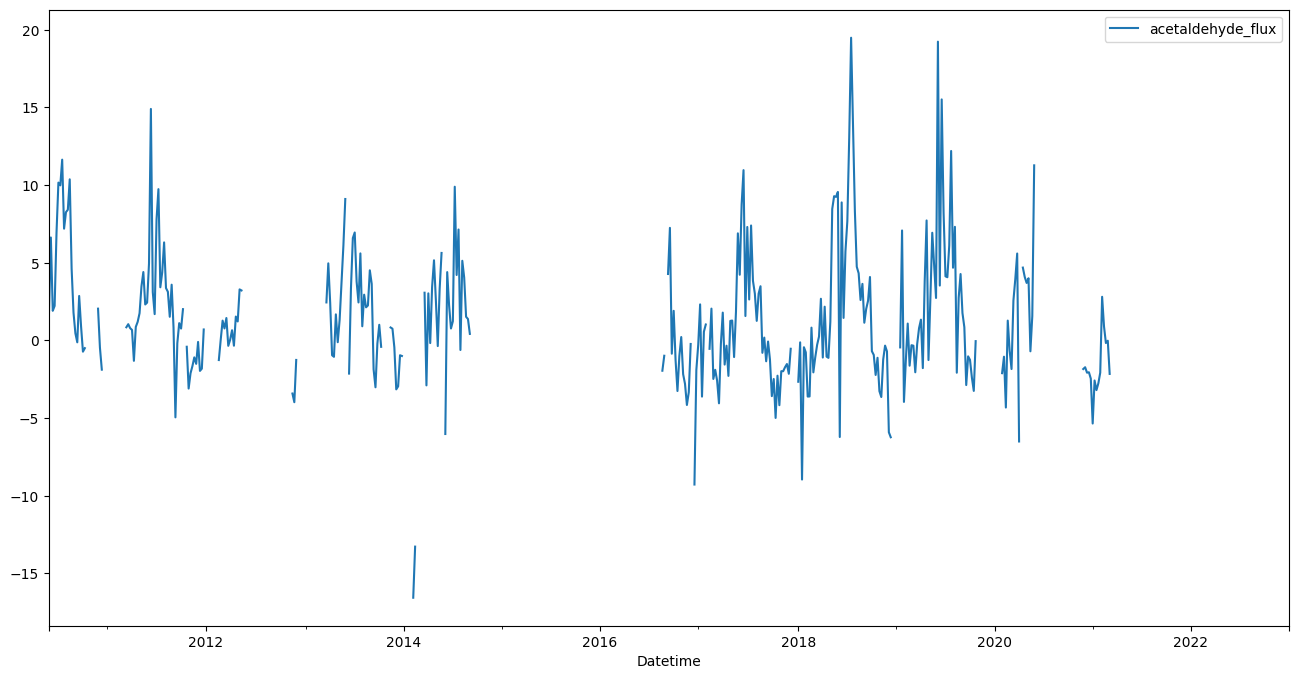

In [98]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

In [101]:
weekly_df3 = df3.resample('W', on = 'Datetime').mean().reset_index()
weekly_df3.head()
weekly_df4 = df4.resample('W', on = 'Datetime').mean().reset_index()
weekly_df4.head()

,Datetime,Unnamed: 0,HYY_EDDY233.LE,HYY_EDDY233.Qc_LE
0,2001-01-07,90.0,2.606718,NaN
1,2001-01-14,305.0,2.631150,NaN
2,2001-01-21,538.0,2.748805,NaN
3,2001-01-28,777.0,3.311390,NaN
4,2001-02-04,1061.5,0.888970,NaN


<Axes: xlabel='Datetime'>

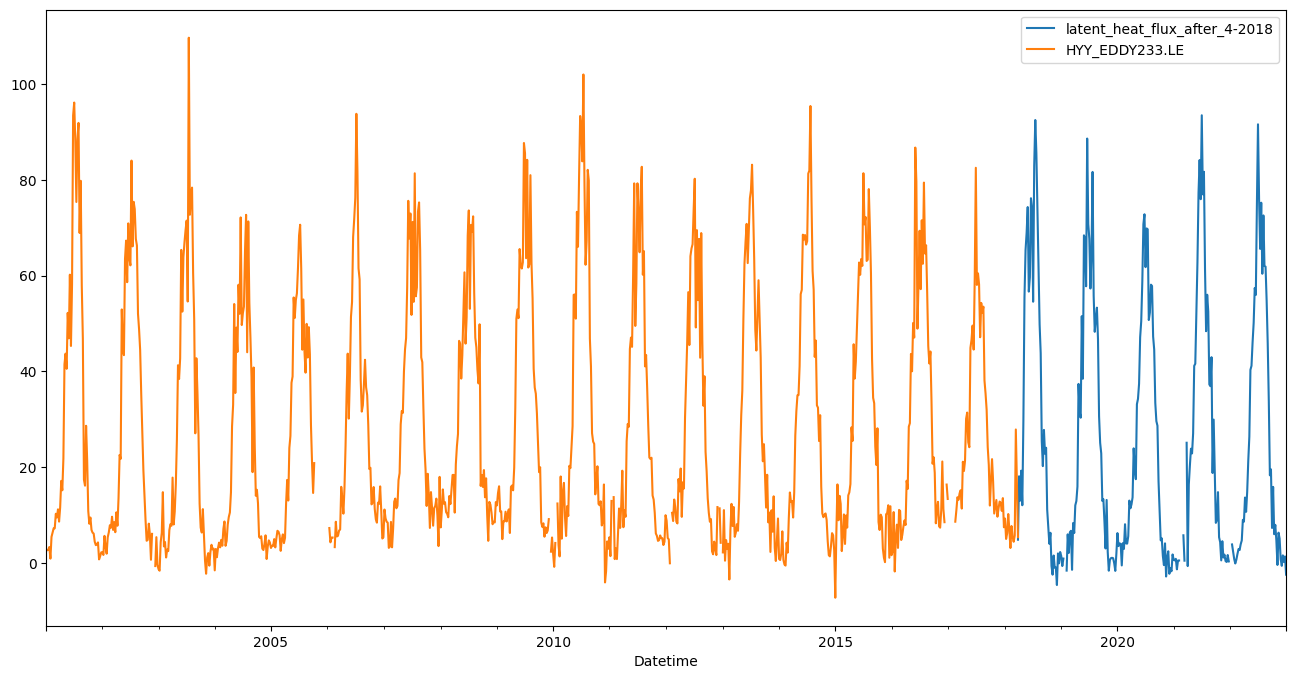

In [102]:
fig, ax = plt.subplots(figsize=(16,8))
weekly_df3.plot('Datetime', 'latent_heat_flux_after_4-2018', ax=ax)
weekly_df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)

## Monthly data

In [91]:
monthly_df1 = df1.resample('M', on = 'Datetime').mean().reset_index()
monthly_df1.head()

/tmp/ipykernel_15892/2348110587.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df1 = df1.resample('M', on = 'Datetime').mean().reset_index()


,Datetime,Unnamed: 0,NEE,NEE_gapfilling_method,GPP
0,2001-01-31,743.5,0.500258,0.752016,0.078475
1,2001-02-28,2159.5,0.506229,0.708333,0.104264
2,2001-03-31,3575.5,0.530796,0.452285,0.235153
3,2001-04-30,5039.5,-0.229057,0.326389,1.650933
4,2001-05-31,6503.5,-1.966106,0.340054,4.672889


<Axes: xlabel='Datetime'>

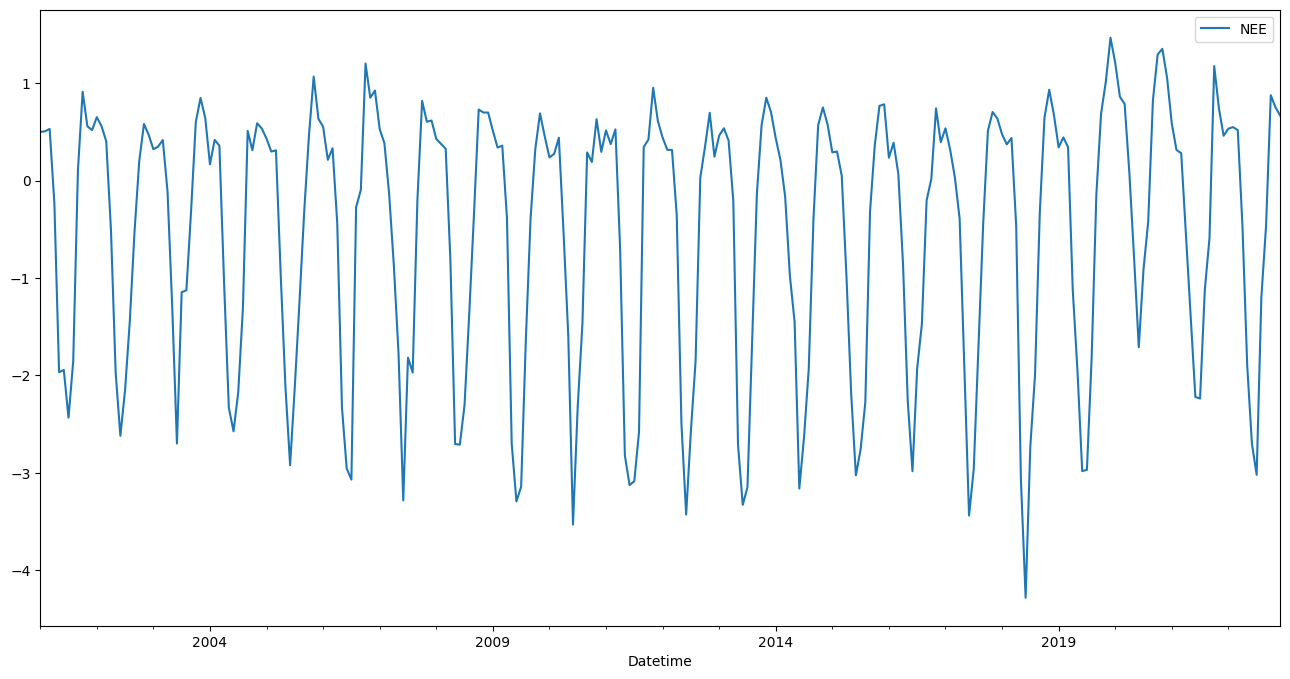

In [32]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df1.plot('Datetime','NEE', ax=ax)

In [33]:
monthly_df2 = df2.resample('M', on = 'Datetime').mean().reset_index()
monthly_df2.head()

/tmp/ipykernel_15892/3324651183.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df2 = df2.resample('M', on = 'Datetime').mean().reset_index()


,Datetime,Unnamed: 0,monoterpene_flux,methanol_flux,acetone_flux,acetaldehyde_flux
0,2010-05-31,11.0,25.416085,12.598373,2.743635,2.008649
1,2010-06-30,79.0,73.983493,24.146687,12.054399,5.020212
2,2010-07-31,221.5,113.258477,28.117600,21.740744,9.506929
3,2010-08-31,394.0,73.210875,10.734172,9.513922,5.129237
4,2010-09-30,564.0,34.914151,1.506185,-2.420466,1.028728


<Axes: xlabel='Datetime'>

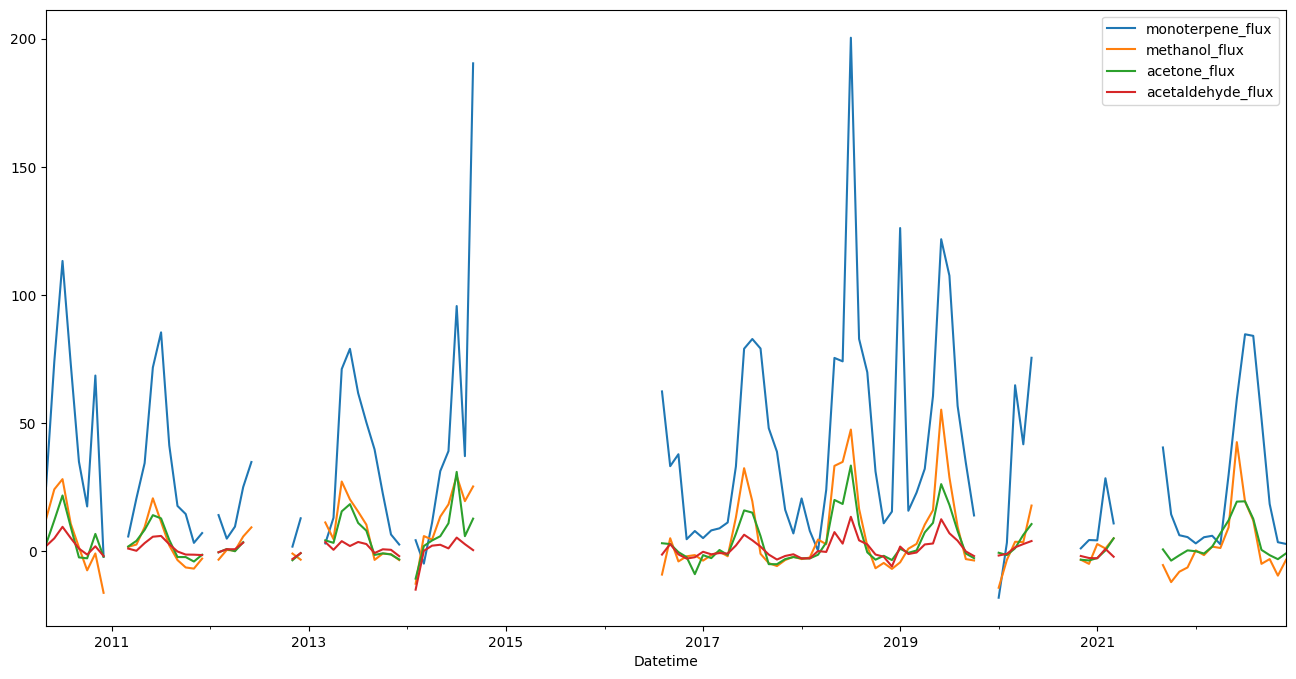

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df2.plot('Datetime', 'monoterpene_flux', ax=ax)
monthly_df2.plot('Datetime', 'methanol_flux', ax=ax)
monthly_df2.plot('Datetime', 'acetone_flux', ax=ax)
monthly_df2.plot('Datetime', 'acetaldehyde_flux', ax=ax)

In [38]:
monthly_df3 = df3.resample('M', on = 'Datetime').mean().reset_index()
monthly_df3.head()

/tmp/ipykernel_15892/3689123087.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df3 = df3.resample('M', on = 'Datetime').mean().reset_index()


,Datetime,Unnamed: 0,latent_heat_flux_after_4-2018,latent_heat_flux_quality_flag_after_4-2018
0,2018-04-30,694.0,15.353727,0.493880
1,2018-05-31,2112.5,58.062228,0.241713
2,2018-06-30,3545.5,67.300773,0.184767
3,2018-07-31,4972.5,78.518449,0.282730
4,2018-08-31,6418.0,51.055049,0.358076


In [45]:
monthly_df4 = df4.resample('M', on = 'Datetime').mean().reset_index()
monthly_df4.head()

/tmp/ipykernel_15892/2774332302.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_df4 = df4.resample('M', on = 'Datetime').mean().reset_index()


,Datetime,Unnamed: 0,HYY_EDDY233.LE,HYY_EDDY233.Qc_LE
0,2001-01-31,512.0,2.803608,NaN
1,2001-02-28,1610.0,5.288194,NaN
2,2001-03-31,2897.0,9.736921,NaN
3,2001-04-30,4313.5,16.981594,NaN
4,2001-05-31,5765.5,44.738316,NaN


<Axes: xlabel='Datetime'>

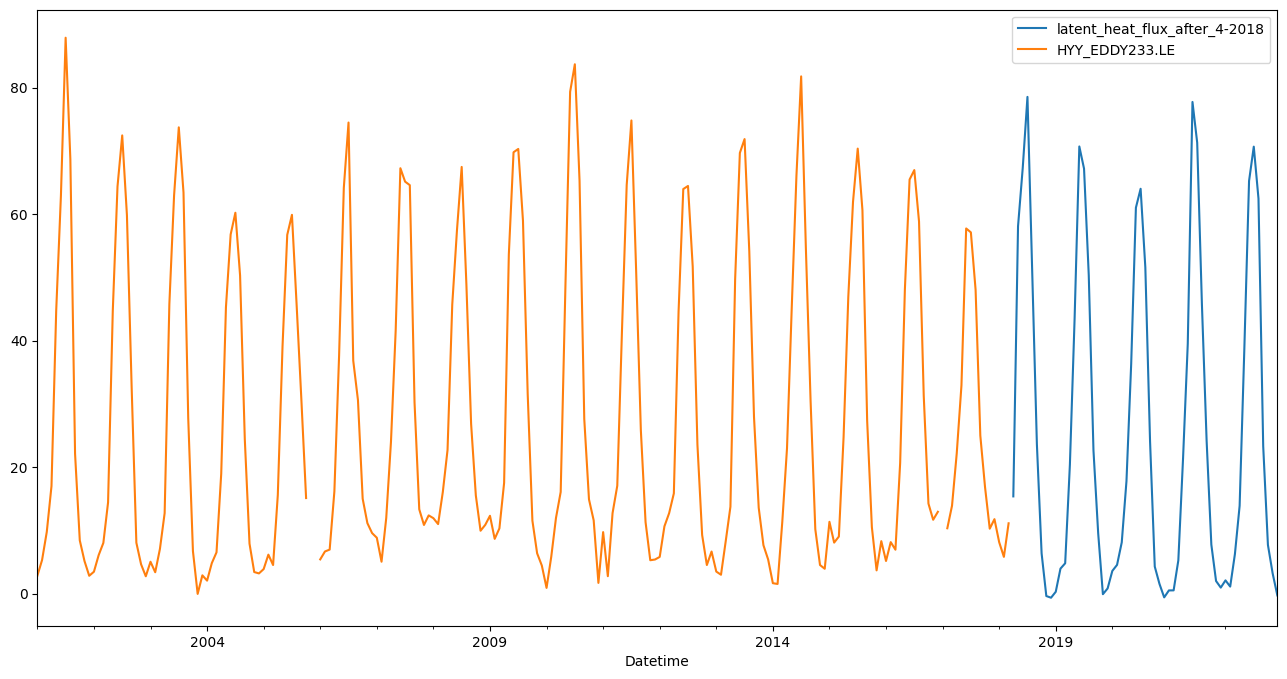

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
monthly_df3.plot('Datetime', 'latent_heat_flux_after_4-2018', ax=ax)
monthly_df4.plot('Datetime', 'HYY_EDDY233.LE', ax=ax)